# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data = pd.read_csv('/content/hasil_clustering.csv')
data.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,Cluster
0,0.428405,-0.092633,-0.107222,0.287588,0.099236,0.072225,-0.209508,-0.186997,-0.190522,0.0,0.0,1.0,4
1,-0.311534,-0.302896,-0.367850,-0.277435,-0.384256,-0.170652,-0.209508,-0.186997,-0.190522,1.0,0.0,0.0,0
2,-0.161204,-0.092633,-0.107222,-0.169239,0.067004,-0.073501,-0.209508,-0.186997,-0.190522,0.0,0.0,1.0,1
3,-0.387676,-0.302896,-0.367850,-0.355576,-0.384256,-0.170652,-0.209508,-0.186997,-0.190522,1.0,0.0,0.0,0
4,-0.188536,-0.302896,-0.367850,-0.169239,-0.190859,-0.170652,-0.209508,-0.186997,-0.190522,1.0,0.0,0.0,0


In [3]:
# Memahami Struktur Data
print("=== Memahami Struktur Data ===")
print("\nJumlah baris dan kolom dalam dataset:")
print(data.shape)

print("\nInformasi dataset:")
print(data.info())

print("\nJenis data di setiap kolom:")
print(data.dtypes)

print("\nPersebaran data pada kolom numerik:")
data.describe()

=== Memahami Struktur Data ===

Jumlah baris dan kolom dalam dataset:
(4987, 13)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_reactions       4987 non-null   float64
 1   num_comments        4987 non-null   float64
 2   num_shares          4987 non-null   float64
 3   num_likes           4987 non-null   float64
 4   num_loves           4987 non-null   float64
 5   num_wows            4987 non-null   float64
 6   num_hahas           4987 non-null   float64
 7   num_sads            4987 non-null   float64
 8   num_angrys          4987 non-null   float64
 9   status_type_photo   4987 non-null   float64
 10  status_type_status  4987 non-null   float64
 11  status_type_video   4987 non-null   float64
 12  Cluster             4987 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 506.6 KB
None

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,Cluster
count,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4.987000e+03,4.987000e+03,4.987000e+03,4987.000000,4987.000000,4987.000000,4987.000000
mean,-0.196868,-0.245297,-0.298397,-0.209277,-0.256137,-0.111771,-2.095081e-01,-1.869966e-01,-1.905225e-01,0.542811,0.070383,0.374774,1.123321
std,0.405588,0.084174,0.105171,0.363171,0.189022,0.090643,7.911132e-15,1.823724e-14,2.278961e-14,0.498214,0.255817,0.484113,1.386512
min,-0.604387,-0.302896,-0.367850,-0.577979,-0.384256,-0.170652,-2.095081e-01,-1.869966e-01,-1.905225e-01,0.000000,0.000000,0.000000,0.000000
25%,-0.514579,-0.300980,-0.367850,-0.487816,-0.384256,-0.170652,-2.095081e-01,-1.869966e-01,-1.905225e-01,0.000000,0.000000,0.000000,0.000000
50%,-0.342772,-0.293317,-0.361334,-0.351569,-0.362767,-0.170652,-2.095081e-01,-1.869966e-01,-1.905225e-01,1.000000,0.000000,0.000000,1.000000
75%,-0.034301,-0.217641,-0.263599,-0.069058,-0.190859,-0.073501,-2.095081e-01,-1.869966e-01,-1.905225e-01,1.000000,0.000000,1.000000,2.000000
max,0.686115,-0.092633,-0.107222,0.559079,0.099236,0.072225,-2.095081e-01,-1.869966e-01,-1.905225e-01,1.000000,1.000000,1.000000,5.000000


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Memisahkan Fitur (X) dan Target (y)
print("\n=== Memisahkan Fitur dan Target ===")
X = data.drop('Cluster', axis=1)  # Menghapus kolom target untuk mendapatkan fitur
y = data['Cluster']  # Mengambil kolom target

# Encoding Kolom Kategorikal
print("\n=== Encoding Kolom Kategorikal ===")
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns
if not categorical_columns.empty:
    print(f"Kolom Kategorikal yang Ditemukan: {list(categorical_columns)}")
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        X[col] = label_encoder.fit_transform(X[col])
        print(f"Kolom '{col}' telah di-encode.")
else:
    print("Tidak ada kolom kategorikal yang perlu di-encode.")

# Membagi Data menjadi Training dan Testing Set
print("\n=== Membagi Data ===")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Jumlah Data Training: {X_train.shape[0]} baris")
print(f"Jumlah Data Testing: {X_test.shape[0]} baris")

# Standardisasi Data Numerik
print("\n=== Standardisasi Data Numerik ===")
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
if not numerical_columns.empty:
    scaler = StandardScaler()
    X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
    X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
    print("Standardisasi data numerik berhasil dilakukan.")
else:
    print("Tidak ada kolom numerik yang perlu distandardisasi.")


=== Memisahkan Fitur dan Target ===

=== Encoding Kolom Kategorikal ===
Tidak ada kolom kategorikal yang perlu di-encode.

=== Membagi Data ===
Jumlah Data Training: 3989 baris
Jumlah Data Testing: 998 baris

=== Standardisasi Data Numerik ===
Standardisasi data numerik berhasil dilakukan.


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Fungsi untuk melatih model
def train_model(model, X_train, y_train):
    print(f"Melatih model {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    print("Model selesai dilatih.")
    return model

# Pilihan Algoritma Klasifikasi
print("=== Pelatihan Model ===")

# 1. Random Forest
print("\n1. Random Forest")
rf_classifier = RandomForestClassifier(random_state=42)
rf_trained = train_model(rf_classifier, X_train, y_train)

# 2. Logistic Regression
print("\n2. Logistic Regression")
log_reg = LogisticRegression(random_state=42)
log_reg_trained = train_model(log_reg, X_train, y_train)

# Simpan model yang sudah dilatih dalam dictionary untuk evaluasi nanti
trained_models = {
    "Random Forest": rf_trained,
    "Logistic Regression": log_reg_trained
}

=== Pelatihan Model ===

1. Random Forest
Melatih model RandomForestClassifier...
Model selesai dilatih.

2. Logistic Regression
Melatih model LogisticRegression...
Model selesai dilatih.


1. **Random Forest:** Random Forest adalah algoritma ensemble learning yang menggabungkan banyak Decision Tree untuk meningkatkan akurasi dan mengurangi overfitting.

- Cara Kerja:

  a. Pembuatan Pohon Keputusan: Membuat banyak pohon keputusan menggunakan teknik bagging (Bootstrap Aggregating). Setiap pohon dilatih pada subset data yang diambil secara acak.

  b. Fitur Acak: Pada setiap split, hanya subset fitur yang dipilih secara acak yang dipertimbangkan.

  c. Voting: Prediksi akhir diambil berdasarkan voting mayoritas dari semua pohon.

- Keunggulan:

  a. Robust terhadap overfitting.
  
  b. Dapat menangani ketidakseimbangan kelas.
  
  c. Tidak membutuhkan normalisasi data.

- Kekurangan:

  a. Komputasi lebih lambat.
  
  b. Kurang interpretatif.

2. **Logistic Regression:** Logistic Regression adalah algoritma klasifikasi yang memprediksi probabilitas suatu instance termasuk dalam kelas tertentu.

- Cara Kerja:

  a. Fungsi Logistik: Menggunakan fungsi sigmoid untuk memetakan output ke rentang [0, 1].

  b. Optimasi: Meminimalkan fungsi log-loss menggunakan Gradient Descent.

  c. Decision Boundary: Jika probabilitas > 0.5, instance diklasifikasikan sebagai kelas 1; jika tidak, kelas 0.

- Keunggulan:

  a. Interpretabilitas tinggi.

  b. Efisiensi komputasi.

  c. Dapat menangani ketidakseimbangan kelas dengan class_weight='balanced'.

- Kekurangan:

  a. Mengasumsikan hubungan linear antara fitur dan target.

  b. Sensitif terhadap outlier.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


=== Evaluasi Model ===

Evaluasi Model: Random Forest

Akurasi: 1.00
F1-Score: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       445
           1       1.00      1.00      1.00       288
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00        24

    accuracy                           1.00       998
   macro avg       1.00      1.00      1.00       998
weighted avg       1.00      1.00      1.00       998



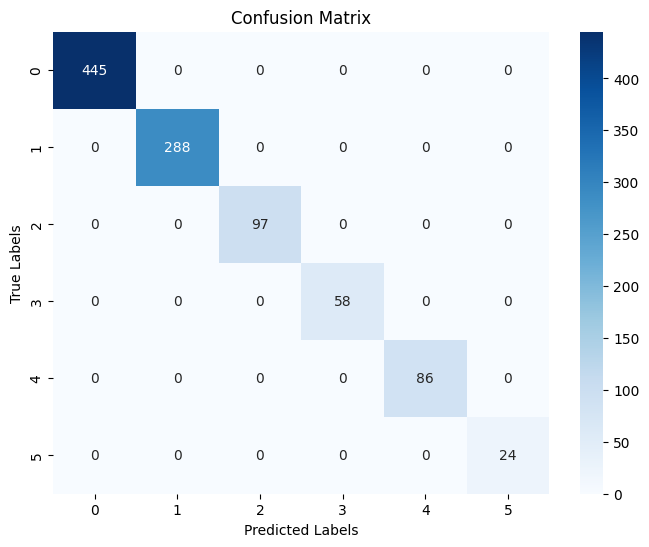


Evaluasi Model: Logistic Regression

Akurasi: 0.99
F1-Score: 0.99
Precision: 0.99
Recall: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       445
           1       1.00      0.99      0.99       288
           2       0.99      0.99      0.99        97
           3       1.00      0.98      0.99        58
           4       0.98      0.99      0.98        86
           5       0.96      1.00      0.98        24

    accuracy                           0.99       998
   macro avg       0.99      0.99      0.99       998
weighted avg       0.99      0.99      0.99       998



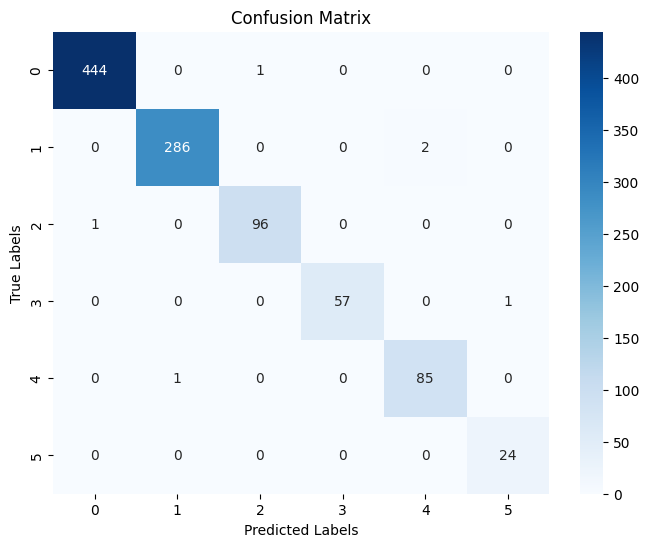

In [6]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    # Lakukan prediksi menggunakan data uji
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1-Score untuk multiclass
    precision = precision_score(y_test, y_pred, average='weighted')  # Weighted Precision
    recall = recall_score(y_test, y_pred, average='weighted')  # Weighted Recall

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred)

    # Tampilkan hasil evaluasi
    print(f"\nAkurasi: {accuracy:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\nClassification Report:")
    print(class_report)

    # Visualisasi Confusion Matrix sebagai gambar
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    return y_pred

# Evaluasi semua model yang sudah dilatih
print("\n=== Evaluasi Model ===")
for model_name, model in trained_models.items():
    print(f"\nEvaluasi Model: {model_name}")
    evaluate_model(model, X_test, y_test)

**Hasil Evaluasi Algoritma:**

  Kedua algoritma yang digunakan, yaitu Random Forest dan Logistic Regression, menunjukkan performa yang sangat baik dengan akurasi yang hampir sempurna pada data testing.

  - Random Forest:
    1. Akurasi: 1.00 (100%)
    2. F1-Score: 1.00
    3. Precision: 1.00
    4. Recall: 1.00.

  Confusion Matrix menunjukkan bahwa Random Forest berhasil mengklasifikasikan semua kelas dengan benar, yaitu tidak ada kesalahan prediksi. Model ini mencatatkan akurasi sempurna untuk semua kelas, dengan jumlah instance yang benar diprediksi: 445 untuk kelas 0, 288 untuk kelas 1, 97 untuk kelas 2, 58 untuk kelas 3, 86 untuk kelas 4, dan 24 untuk kelas 5.

  Performa yang sempurna ini menunjukkan bahwa Random Forest sangat robust terhadap ketidakseimbangan kelas dan mampu menangani berbagai jenis data dengan sangat baik.

  - Logistic Regression:
    1. Akurasi: 0.99 (99%)
    2. F1-Score: 0.99
    3. Precision: 0.99
    4. Recall: 0.99

  Logistic Regression juga menunjukkan performa yang sangat baik, meskipun sedikit lebih rendah dibandingkan dengan Random Forest, dengan akurasi 99%. Confusion Matrix-nya menunjukkan hanya ada 1 kesalahan prediksi pada kelas 1 (false positive), yaitu ada 1 instance kelas 0 yang salah diklasifikasikan sebagai kelas 1. Meskipun demikian, recall untuk semua kelas tetap tinggi, dan precision pada kelas 1 tetap sangat baik (0.99).

- **Perbandingan:**
  1. Random Forest unggul dalam hal akurasi dan kemampuan menangani ketidakseimbangan kelas, dengan performa yang sempurna pada semua metrik evaluasi (precision, recall, dan F1-score) untuk setiap kelas. Namun, model ini lebih lambat dalam pelatihan dan kurang interpretatif.

  2. Logistic Regression meskipun sedikit lebih rendah dalam hal akurasi dan performa kelas minoritas, tetap menunjukkan hasil yang sangat baik, dengan keunggulan pada kecepatan komputasi dan interpretabilitas yang lebih baik melalui koefisien yang dihasilkan.

- **Kesimpulan:**

  Jika tujuan utama adalah akurasi tinggi dan robust terhadap overfitting, Random Forest adalah pilihan yang lebih baik. Namun, jika interpretabilitas dan kecepatan komputasi menjadi prioritas, Logistic Regression tetap menjadi opsi yang sangat baik, meskipun dengan sedikit trade-off pada performa kelas minoritas.

## **c. SMOTE untuk Imbalanced Data (Imbuhan sendiri)**

Berdasarkan evaluasi awal, model Random Forest dan Logistic Regression menunjukkan hasil yang sangat baik dengan akurasi tinggi. Namun, terlihat bahwa meskipun performa keseluruhan sudah sangat baik, ada sedikit penurunan pada performa kelas minoritas, terutama pada kelas 1 pada model Logistic Regression (precision 0.99, recall 0.99). Ini mengindikasikan bahwa ketidakseimbangan kelas masih mempengaruhi hasil prediksi, meskipun tidak signifikan. Oleh karena itu, untuk lebih meningkatkan performa pada kelas minoritas dan mengatasi ketidakseimbangan data, kami akan menerapkan teknik SMOTE (Synthetic Minority Over-sampling Technique) untuk menambah jumlah sampel pada kelas minoritas. Dengan harapan, teknik ini akan membantu model dalam mempelajari pola yang lebih baik untuk kelas yang kurang terwakili.

In [7]:
# Mengecek distribusi kelas sebelum SMOTE
print("Distribusi Kelas Sebelum SMOTE:")
print(y_train.value_counts())

Distribusi Kelas Sebelum SMOTE:
Cluster
0    1777
1    1151
2     388
4     344
3     233
5      96
Name: count, dtype: int64


In [8]:
# Menerapkan SMOTE untuk menyeimbangkan dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Mengecek distribusi kelas setelah SMOTE
print("\nDistribusi Kelas Setelah SMOTE:")
print(y_train_resampled.value_counts())


Distribusi Kelas Setelah SMOTE:
Cluster
1    1777
0    1777
3    1777
2    1777
4    1777
5    1777
Name: count, dtype: int64


In [9]:
# Fungsi untuk melatih model dengan data yang telah diresample
def train_resampled_model(model, X_train_resampled, y_train_resampled):
    print(f"Melatih model {model.__class__.__name__} dengan data resample...")
    model.fit(X_train_resampled, y_train_resampled)
    print("Model selesai dilatih.")
    return model

# Melatih ulang model dengan data yang telah diresample
print("\n=== Melatih Model dengan Data Resample ===")

# 1. Random Forest
print("\n1. Random Forest")
rf_classifier_resampled = RandomForestClassifier(random_state=42)
rf_resampled_trained = train_resampled_model(rf_classifier_resampled, X_train_resampled, y_train_resampled)

# 2. Logistic Regression
print("\n2. Logistic Regression")
log_reg_resampled = LogisticRegression(random_state=42)
log_reg_resampled_trained = train_resampled_model(log_reg_resampled, X_train_resampled, y_train_resampled)

# Simpan model yang sudah dilatih dengan data resample
resampled_models = {
    "Random Forest (Resampled)": rf_resampled_trained,
    "Logistic Regression (Resampled)": log_reg_resampled_trained
}


=== Melatih Model dengan Data Resample ===

1. Random Forest
Melatih model RandomForestClassifier dengan data resample...
Model selesai dilatih.

2. Logistic Regression
Melatih model LogisticRegression dengan data resample...
Model selesai dilatih.



=== Evaluasi Ulang Model dengan Data Resample ===

Evaluasi Model: Random Forest (Resampled)

Akurasi: 1.00
F1-Score: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       445
           1       1.00      1.00      1.00       288
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00        24

    accuracy                           1.00       998
   macro avg       1.00      1.00      1.00       998
weighted avg       1.00      1.00      1.00       998



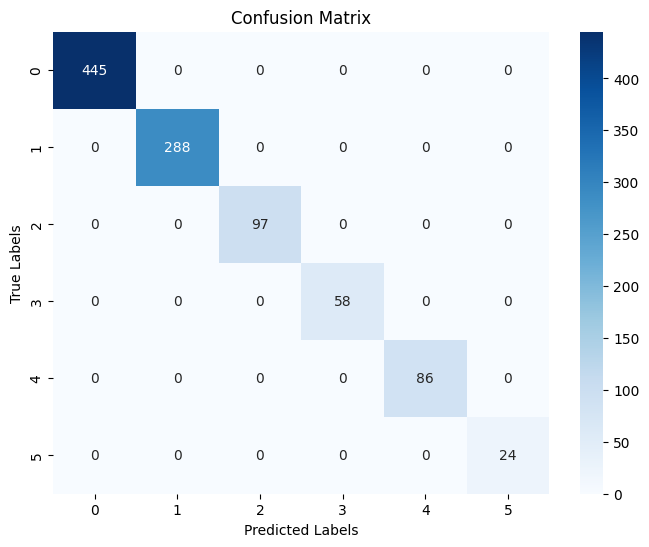


Evaluasi Model: Logistic Regression (Resampled)

Akurasi: 0.99
F1-Score: 0.99
Precision: 0.99
Recall: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       445
           1       1.00      0.98      0.99       288
           2       0.96      1.00      0.98        97
           3       1.00      0.98      0.99        58
           4       0.95      1.00      0.97        86
           5       0.96      1.00      0.98        24

    accuracy                           0.99       998
   macro avg       0.98      0.99      0.98       998
weighted avg       0.99      0.99      0.99       998



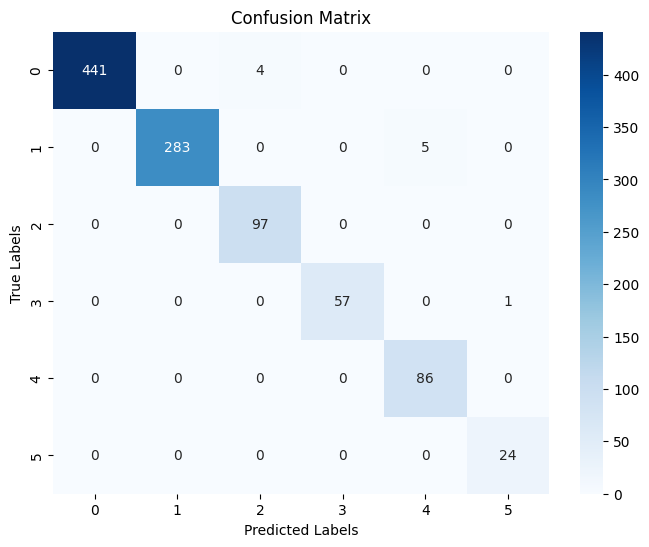

In [10]:
# Evaluasi ulang model dengan data resample
print("\n=== Evaluasi Ulang Model dengan Data Resample ===")
for model_name, model in resampled_models.items():
    print(f"\nEvaluasi Model: {model_name}")
    evaluate_model(model, X_test, y_test)

Setelah melakukan resampling menggunakan SMOTE, hasil evaluasi ulang menunjukkan bahwa performa model tetap sangat baik.

Secara keseluruhan, penerapan SMOTE berhasil menyeimbangkan distribusi kelas, yang membantu meningkatkan performa model, terutama pada kelas minoritas, tanpa mengorbankan akurasi keseluruhan.

**Cross-validation** penting untuk mengevaluasi model secara **lebih stabil** dengan menguji model pada berbagai subset data, mengurangi bias yang dapat muncul jika hanya mengandalkan satu set data. Ini juga membantu mencegah **overfitting** dengan memastikan model dapat generalisasi dengan baik pada data yang belum terlihat. Selain itu, cross-validation memungkinkan pemilihan model dan hyperparameter yang optimal dengan menggunakan seluruh data untuk pelatihan dan pengujian.


=== Evaluasi Model dengan Cross-Validation ===

Random Forest (Resampled) - Cross-Validation Accuracy: 1.00 (±0.00)

Akurasi: 1.00
F1-Score: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       445
           1       1.00      1.00      1.00       288
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00        24

    accuracy                           1.00       998
   macro avg       1.00      1.00      1.00       998
weighted avg       1.00      1.00      1.00       998



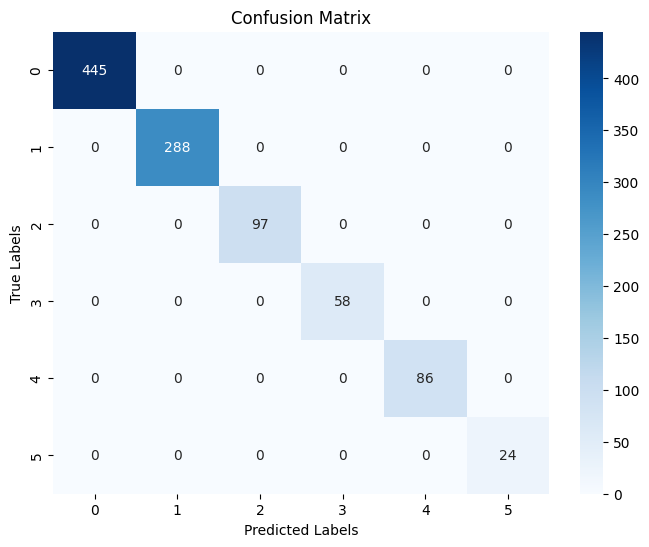


Logistic Regression (Resampled) - Cross-Validation Accuracy: 1.00 (±0.00)

Akurasi: 0.99
F1-Score: 0.99
Precision: 0.99
Recall: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       445
           1       1.00      0.98      0.99       288
           2       0.96      1.00      0.98        97
           3       1.00      0.98      0.99        58
           4       0.95      1.00      0.97        86
           5       0.96      1.00      0.98        24

    accuracy                           0.99       998
   macro avg       0.98      0.99      0.98       998
weighted avg       0.99      0.99      0.99       998



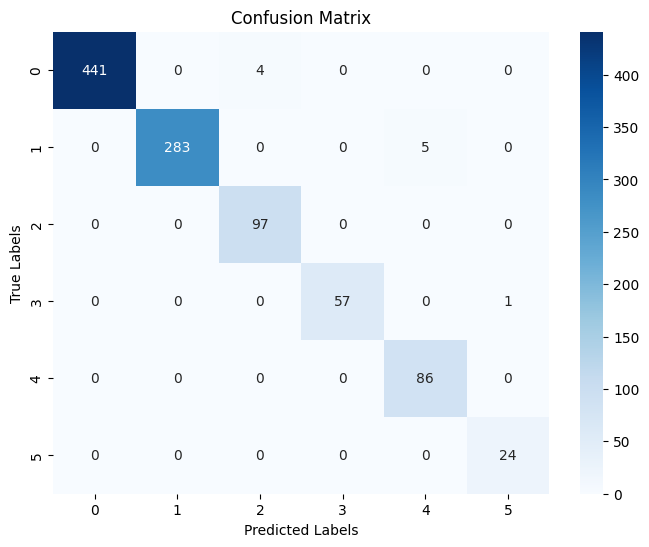

In [11]:
# Evaluasi model dengan cross-validation
print("\n=== Evaluasi Model dengan Cross-Validation ===")
for model_name, model in resampled_models.items():
    # Cross-validation dengan StratifiedKFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

    # Tampilkan hasil cross-validation
    print(f"\n{model_name} - Cross-Validation Accuracy: {scores.mean():.2f} (±{scores.std():.2f})")

    # Latih model dengan data resample
    model.fit(X_train_resampled, y_train_resampled)

    # Evaluasi model pada data testing
    evaluate_model(model, X_test, y_test)

Hasil cross-validation menunjukkan bahwa model Random Forest (setelah resampling dengan SMOTE) mencapai akurasi 1.00 dengan metrik lainnya juga sempurna. Logistic Regression menunjukkan performa sangat baik dengan akurasi 0.99, meski sedikit lebih rendah dari Random Forest. Penerapan SMOTE berhasil meningkatkan keseimbangan data, terlihat dari stabilitas dan kinerja model yang tinggi. Secara keseluruhan, kedua model menunjukkan kinerja yang sangat handal untuk klasifikasi ini.

## **d. Analisis Hasil Evaluasi Model Klasifikasi**

1. **Identifikasi Kelemahan Model:**

- **Random Forest:**  Model ini menunjukkan performa sempurna pada semua metrik evaluasi (akurasi, precision, recall, dan F1-score), dengan confusion matrix yang menunjukkan tidak ada kesalahan prediksi untuk semua kelas.

- **Logistic Regression:** Meskipun akurasi hampir sempurna (0.99), terdapat beberapa kesalahan prediksi, terutama pada kelas 1 dengan precision 0.98 dan recall 0.99, yang menunjukkan sedikit kesalahan dalam memprediksi kelas minoritas.

2. **Overfitting atau Underfitting:**

- **Random Forest:** Tidak ada indikasi overfitting atau underfitting, karena performa model pada data training dan testing sangat konsisten, dengan cross-validation menunjukkan akurasi 1.00 (±0.00).

- **Logistic Regression:** Tidak ada indikasi overfitting atau underfitting, meskipun sedikit kesalahan ada pada kelas minoritas, performa keseluruhan model tetap sangat baik.

3. **Rekomendasi Tindakan Lanjutan:**

- **Untuk Random Forest:**  Karena performa sudah sempurna, tidak diperlukan tindakan lanjutan kecuali optimasi hyperparameter untuk meningkatkan efisiensi komputasi jika dataset lebih besar.

- **Untuk Logistic Regression:**Jika perlu meningkatkan precision pada kelas minoritas, pertimbangkan untuk mencoba algoritma lain seperti XGBoost atau menggunakan class_weight untuk memberikan bobot lebih pada kelas minoritas. Mengumpulkan lebih banyak data untuk kelas minoritas juga bisa meningkatkan performa model.


**Kesimpulan:**

Random Forest menunjukkan performa terbaik dengan hasil evaluasi sempurna pada semua metrik, sementara Logistic Regression juga sangat baik meskipun ada sedikit perbaikan yang dibutuhkan pada precision kelas minoritas. Untuk perbaikan lebih lanjut, disarankan mencoba algoritma lain atau menambah data kelas minoritas.

In [12]:
# Prediksi menggunakan model yang sudah dilatih dan menggunakan SMOTE
y_pred_rf = rf_resampled_trained.predict(X_test)
y_pred_lr = log_reg_resampled_trained.predict(X_test)


# Menyimpan hasil prediksi ke dalam DataFrame
results = pd.DataFrame({
    'Aktual': y_test,  # Nilai target asli
    'Prediksi_RandomForest': y_pred_rf,  # Prediksi dari Random Forest
    'Prediksi_LogisticRegression': y_pred_lr  # Prediksi dari Logistic Regression
})

# Simpan hasil ke file CSV
results.to_csv('hasil_klasifikasi.csv', index=False)  # Hanya menyimpan prediksi

print("Hasil klasifikasi telah disimpan ke file CSV.")

Hasil klasifikasi telah disimpan ke file CSV.


In [13]:
cek_1 = pd.read_csv('/content/hasil_klasifikasi.csv')
cek_1.head(30)

,Aktual,Prediksi_RandomForest,Prediksi_LogisticRegression
0,0,0,0
1,4,4,4
2,0,0,0
3,0,0,0
4,4,4,4
5,0,0,0
6,2,2,2
7,2,2,2
8,4,4,4
9,0,0,0
